<a href="https://colab.research.google.com/github/Marimars2001/Costum-light/blob/main/TeoremaConvolucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from PIL import Image
from scipy import signal, fftpack
import matplotlib.pyplot as plt
import numpy as np

In [6]:
plt.rcParams["figure.figsize"]= [12,8]
plt.rcParams["figure.dpi"]= 100

<ipython-input-22-b4b59ed90ff1>:21: ComplexWarning: Casting complex values to real discards the imaginary part
  ejes[0,1].imshow((20*np.log10(0.1 + fftpack.fftshift(imagen_frecuencia))).astype(int), cmap="gray")
<ipython-input-22-b4b59ed90ff1>:35: ComplexWarning: Casting complex values to real discards the imaginary part
  ejes[1,1].imshow((20*np.log10(0.1 + fftpack.fftshift(kernel_frecuencia))).astype(int), cmap="gray")
<ipython-input-22-b4b59ed90ff1>:42: ComplexWarning: Casting complex values to real discards the imaginary part
  ejes[2,0].imshow((20*np.log10(0.1 + fftpack.fftshift(convolucion_frecuencia))).astype(int), cmap="gray")


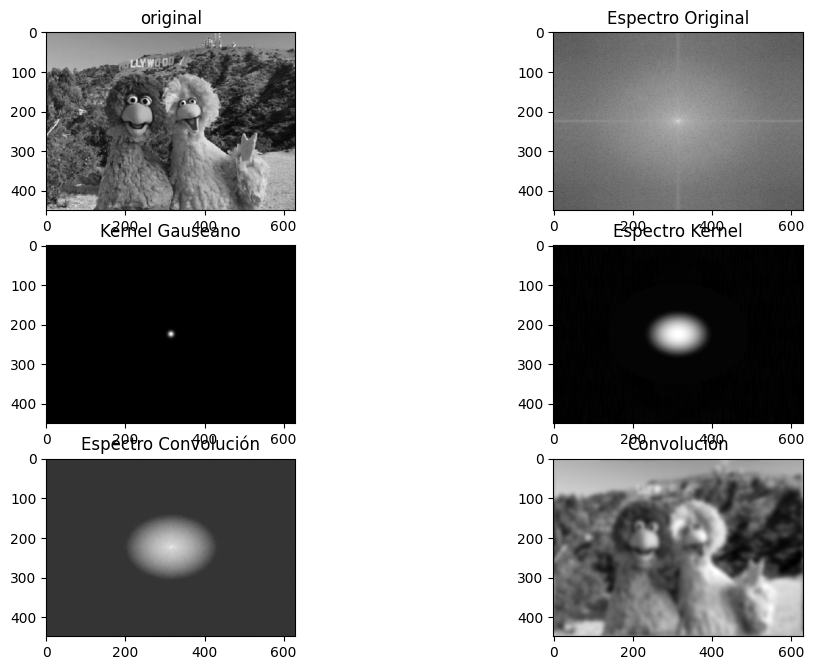

In [22]:
imagen= Image.open("/content/drive/MyDrive/Tareas/plaza sesamo.jpg").convert("L")
#Pasamos la imagen a numpy.
imagen=np.array(imagen)
#Creamos un kernel gaussiano del tamaño de la imagen original.
gauss_kernel= np.outer(signal.gaussian(imagen.shape[0],5), signal.gaussian(imagen.shape[1],5))

imagen_frecuencia= fftpack.fft2(imagen)
kernel_frecuencia= fftpack.fft2(fftpack.ifftshift(gauss_kernel))
convolucion_frecuencia= imagen_frecuencia * kernel_frecuencia
imagen_convolucionada= fftpack.ifft2(convolucion_frecuencia).real

fig, ejes= plt.subplots(3,2)
ejes[0,0].set_title("original")
ejes[0,0].imshow(imagen, cmap="gray")

#              |
#              |
#              v

ejes[0,1].set_title("Espectro Original")
ejes[0,1].imshow((20*np.log10(0.1 + fftpack.fftshift(imagen_frecuencia))).astype(int), cmap="gray")

#              |
#              |
#              v

ejes[1,0].set_title("Kernel Gauseano")
ejes[1,0].imshow(gauss_kernel, cmap="gray")

#              |
#              |
#              v

ejes[1,1].set_title("Espectro Kernel")
ejes[1,1].imshow((20*np.log10(0.1 + fftpack.fftshift(kernel_frecuencia))).astype(int), cmap="gray")

#              |
#              |
#              v

ejes[2,0].set_title("Espectro Convolución")
ejes[2,0].imshow((20*np.log10(0.1 + fftpack.fftshift(convolucion_frecuencia))).astype(int), cmap="gray")

#              |
#              |
#              v

ejes[2,1].set_title("Convolución")
ejes[2,1].imshow(imagen_convolucionada, cmap="gray")